## Project Name : Ford Car Price Prediction

### Contribution : Individual

The aim of this project is to predict the price of ford cars, by analyzing car features such as model, year, fuel type, transmission, engine, mileage, tax, mpg and segment. This project also aims to determine the set of variables that have the greatest impact on car prices.

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True)

In [2]:
# load dataset
dataset = '/content/ford.csv'

df = pd.read_csv(dataset)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


**UNDERSTAND THE GIVEN VARIABLES**

1. **model** - > Ford Car Brands

2. **year** - >Production Year

3. **price** - >Price of car in $

4. **transmission** - > Automatic,Manual, Semi-Auto

5. **mileage** -> Number of miles traveled

6. **fuel_Type** -> Petrol,Diesel,Hybrid,Electric,Other

7. **tax** -> Annual Tax

8. **mpg** - > Miles per Gallon

9. **engineSize** - > Car's Engine Size

## Data Preprocessing Part 1

In [3]:
# checking the shape of datase
df.shape

(17966, 9)

In [4]:
# checking the data types and more info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [5]:
# checking for numerical columns
nums = [i for i in df.columns if df[i].dtypes == 'int64']

df[nums].describe()

,year,price,mileage,tax
count,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456
std,2.050336,4741.343657,19472.054349,62.012456
min,1996.000000,495.000000,1.000000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000
50%,2017.000000,11291.000000,18242.500000,145.000000
75%,2018.000000,15299.000000,31060.000000,145.000000
max,2060.000000,54995.000000,177644.000000,580.000000


In [6]:
# unique value in the columns
df.nunique()

model              24
year               23
price            3511
transmission        3
mileage         13528
fuelType            5
tax                36
mpg                90
engineSize         16
dtype: int64

In [7]:
# checking value counts for categorical columns
cats = ['model', 'transmission', 'fuelType']

for i in cats:
  print(f'Value Counts Col {i}:')
  print(df[i].value_counts())
  print()

Value Counts Col model:
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

Value Counts Col transmission:
Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

Value Counts Col fuelType:
Petrol      12179
Diesel       5762
Hybrid         22
El

In [8]:
# unique car model
df['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

Since there are you many car make, and it is difficult to analyze them individually, so I will group them into categories : Hatchbacks, SUVs, sedan, MPVs, truck, sport car and other.

In [9]:
# Categorizing model car
def segment_model(model):
  if any(category in model for category in ['Fiesta', 'Focus', 'Puma', 'Ka+', 'B-MAX', 'KA', 'Streetka', 'Escort']):
        return 'Hatchbacks'
  elif any(category in model for category in ['Kuga', 'Edge', 'EcoSport']):
        return 'SUVs'
  elif any(category in model for category in ['Mondeo', 'Fusion']):
        return 'Sedan'
  elif any(category in model for category in ['C-MAX', 'S-MAX', 'Grand C-MAX', 'Galaxy', 'Tourneo Connect', 'Tourneo Custom', 'Grand Tourneo Connect']):
        return 'MPVs'
  elif any(category in model for category in ['Transit Tourneo', 'Ranger']):
        return 'Truck'
  elif 'Mustang' in model:
        return 'Sports Car'
  else:
        return 'Other'

df['segment_model'] = df['model'].apply(segment_model)

In [10]:
df.sample(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,segment_model
3756,Focus,2016,8999,Manual,45934,Diesel,0,74.3,1.5,Hatchbacks
128,EcoSport,2018,14698,Manual,6442,Petrol,145,54.3,1.0,SUVs
7336,Fiesta,2013,5999,Manual,46332,Petrol,0,65.7,1.0,Hatchbacks
17123,Fiesta,2018,11200,Manual,20471,Petrol,150,65.7,1.0,Hatchbacks
4454,Fiesta,2018,9750,Manual,15789,Petrol,145,64.2,1.1,Hatchbacks
15054,Kuga,2016,15500,Automatic,28860,Diesel,145,52.3,2.0,SUVs
14165,Fiesta,2017,8503,Manual,13080,Petrol,125,54.3,1.2,Hatchbacks
8332,Fiesta,2016,8966,Manual,12123,Petrol,0,65.7,1.0,Hatchbacks
412,Fiesta,2018,10498,Manual,17532,Petrol,145,65.7,1.0,Hatchbacks
10107,Fiesta,2018,10495,Manual,21092,Petrol,150,58.9,1.0,Hatchbacks


## Eksploratory Data Analysis (EDA)

In the exploratory data analysis, I will analyze the relationship between the target variable and the independent variables. This will help me to understand the data better and to find out the variables that have most impact on the target variable

### **Model Segment**

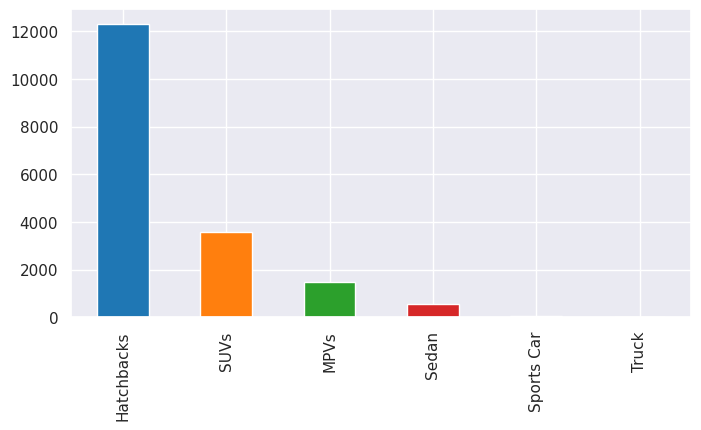

In [11]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(8,4))
df['segment_model'].value_counts().plot(kind='bar', color=colors)
plt.show()

In the dataset, most of the cars are hatchbacks followed by SUVs and MPVs. However the dataset also has sedan as well truck cars. There are also some speciality cars such as mustang. The dataset also has some cars that are not categorized into any of the above categories

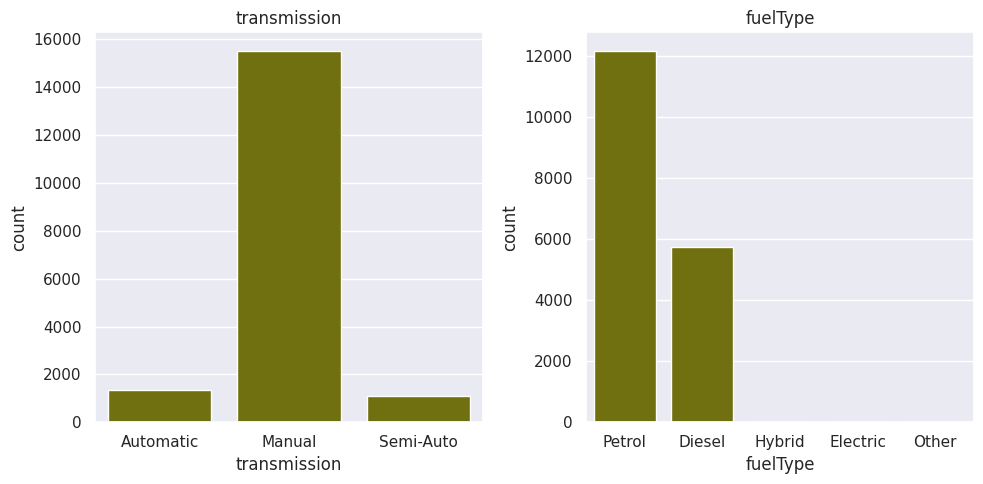

In [12]:
features = ['transmission', 'fuelType']

plt.figure(figsize=(10, 5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.countplot(x=df[features[i]], color='olive')
  plt.title(features[i])
  plt.tight_layout()

From the graph above, we can get an overview of the data of all the categorical variables in the data set. From the graph above, it can be seen that most of them are petrol fueled, followed by diesel fuel, and almost none are electric or hybrid fueled. Most cars also have a manual transmission, followed by semi-automatic and automatic transmissions

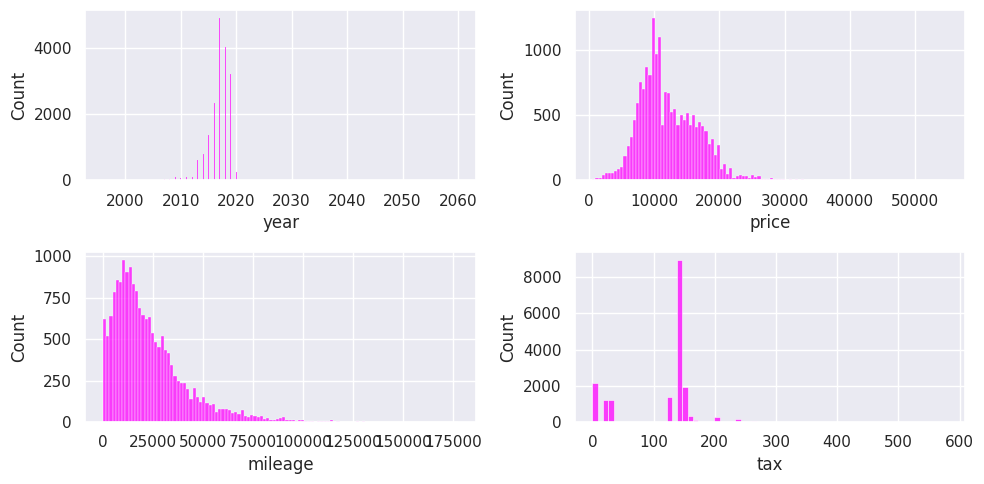

In [13]:
plt.figure(figsize=(10,5))
for i in range(0, len(nums)):
  plt.subplot(2, 2, i+1)
  sns.histplot(x=df[nums[i]], color='magenta')
  plt.tight_layout()

The graph above shows the distribution of data across continuous variables. The majority of cars were produced between 2000 and 2010, have a price of less than 30k USD, a mileage of less than 1 million km, and an annual tax of between 100 - 200k usd.

Since most of the cars were produced after 2010, I will only consider cars produced after 2010.

In [14]:
# Filtering for year > 2010
df = df[df['year'] > 2010]

### Price and model

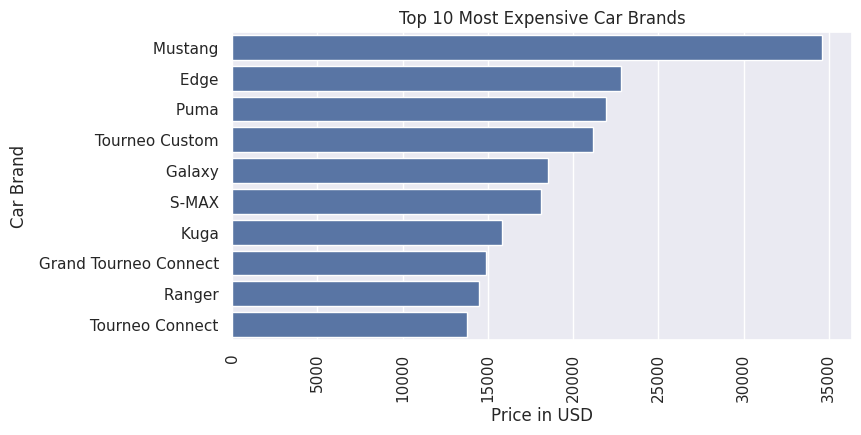

In [15]:
model_df = df.groupby('model')['price'].mean().reset_index()
model_df = model_df.sort_values(by='price', ascending=False).head(10)

#b Bar Plot
plt.figure(figsize=(8,4))
sns.barplot(y='model', x='price', data=model_df)
plt.xticks(rotation=90)
plt.title('Top 10 Most Expensive Car Brands')
plt.ylabel('Car Brand')
plt.xlabel('Price in USD')
plt.show()

This graph shows top 10 most expensive car brands in the data set. The top 5 most expensive car brands are Mustang, edge, puma, tourneo custom, and galaxy.

### Price by transmission

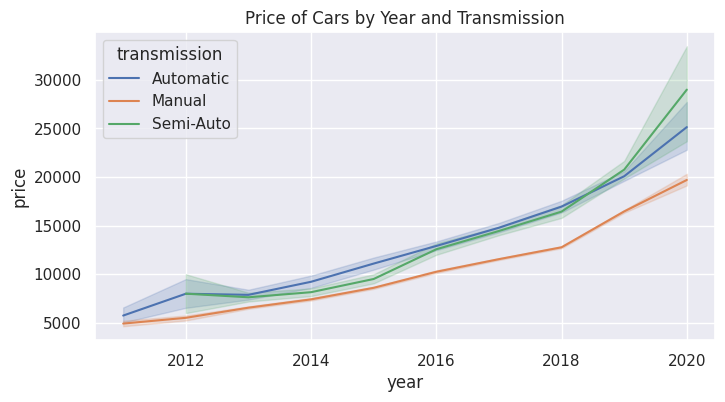

In [16]:
df = df[df['year'] <= 2024]

plt.figure(figsize=(8,4))
sns.lineplot(x='year', y='price', data=df, hue='transmission')
plt.title('Price of Cars by Year and Transmission')
plt.show()

This graph shows changes in car prices based on their transmission. The prices of cars with semi-automatic and auto transmissions experienced a significant increase after 2016, but their prices increased exponentially after 2019. However, the prices of cars with manual transmissions have always been cheaper than cars with automatic transmissions, which showed a similar price increase after 2018.

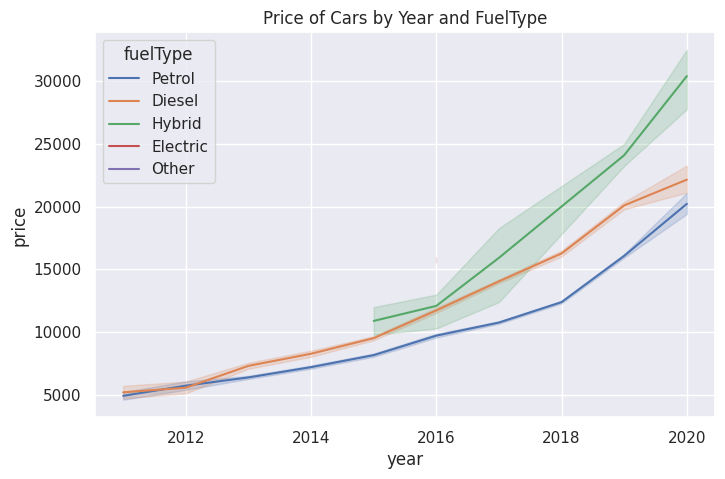

In [17]:
plt.figure(figsize=(8,5))
sns.lineplot(x='year', y='price', data=df, hue='fuelType')
plt.title('Price of Cars by Year and FuelType')
plt.show()

Until 2005, there was no major difference in car prices of cars running on petrol and diesel. However, after 2015, the price of the cars running on petrol increased significantly, whereas the price of the cars running on diesel increased with a very small margin. The graph also highlights the introduction of electro cars, which runs on electricity in 1995. However, the price of the electro cars increases exponentially after 2015, having the highest car price based on fuel type

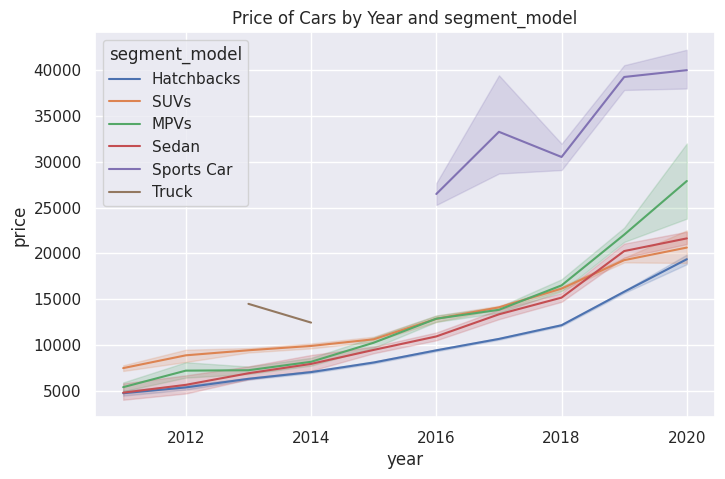

In [18]:
plt.figure(figsize=(8,5))
sns.lineplot(x='year', y='price', data=df, hue='segment_model')
plt.title('Price of Cars by Year and segment_model')
plt.show()

In the graph above it can be seen that there is not really a significant difference between hatchbacks, sedans, MPVs, SUVs. However, the trend obtained is a steady increase from 2012 to 2020, except for truck and sports car models, which can be seen in truck models. that there was a decline from 2013 to 2014 in the type of sports car model which had a fluctuating trend, namely increasing from 2016 to 2017 then decreasing until 2018 and increasing again until 2020.

## Data Preprocessing Part 2

In [19]:
# checking null values
df.isnull().sum() * 100 / len(df)

model            0.0
year             0.0
price            0.0
transmission     0.0
mileage          0.0
fuelType         0.0
tax              0.0
mpg              0.0
engineSize       0.0
segment_model    0.0
dtype: float64

It turns out that there are no null values ​​in the dataset above.

In [20]:
df.drop('model', axis=1, inplace=True)

### Label Encoding for object data type

In [21]:
df.dtypes

year               int64
price              int64
transmission      object
mileage            int64
fuelType          object
tax                int64
mpg              float64
engineSize       float64
segment_model     object
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# cols for encode
cols = ['transmission', 'fuelType', 'segment_model']

#label encoding for each column
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

transmission [0 1 2]
fuelType [4 0 2 1 3]
segment_model [0 2 1 3 4 5]


## Correlation Hetmap

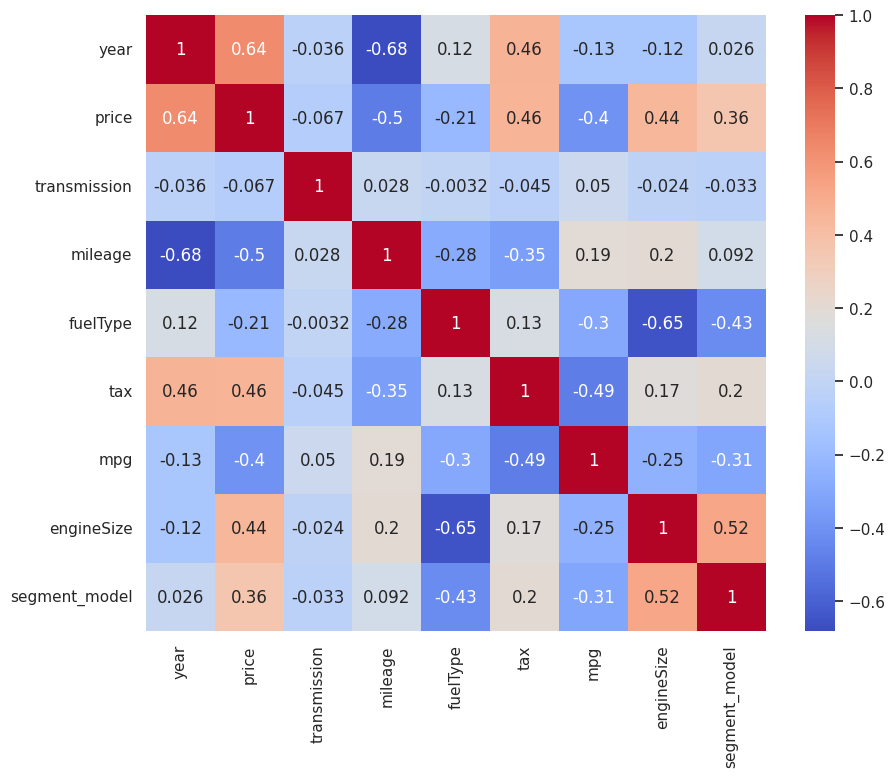

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

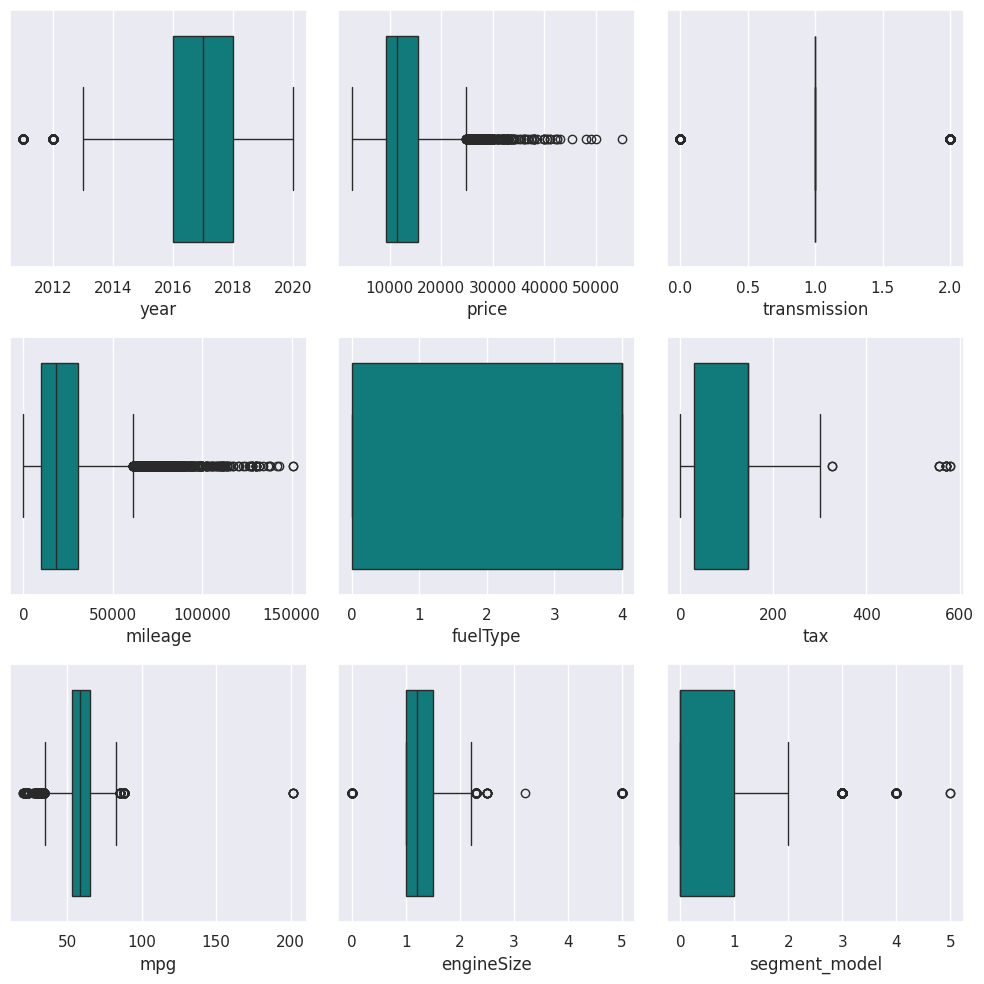

In [24]:
# checking outlier for each col using boxplot
check_outlier = df.columns

plt.figure(figsize=(10,10))
for i in range(0, len(check_outlier)):
  plt.subplot(3, 3, i+1)
  sns.boxplot(x=df[check_outlier[i]], color='darkcyan', orient='v')
  plt.tight_layout()

## Outlier Removal

In [25]:
# Using Z-score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(df))

threshold = 3

#columns with outliers
cols = ['year', 'mileage', 'price', 'mpg', 'engineSize', 'tax']

#removing outliers
df = df[(z < threshold).all(axis=1)]

## Train Test Split

In [26]:
X = df.drop('price', axis=1)
y = df['price']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling & Evaluation

### Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor Object
dtr = DecisionTreeRegressor()

### Hypertuning using GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV

# Parameters for Grid Search
params = {
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Membuat objek GridSearchCV
grid = GridSearchCV(estimator=dtr, param_grid=params, cv=10, verbose=1, n_jobs=-1)

# Fitting the Grid Search
grid.fit(X_train, y_train)

# Menampilkan best parameters
print("Best Hyperparameters:", grid.best_params_)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [42]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=None, min_samples_leaf=4, min_samples_split=2, random_state=0)

#fitting the model
dtr.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=4, random_state=0)

In [43]:
# predicting the test set
y_pred = dtr.predict(X_test)

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.8906856171943083
Mean Squared Error:  1876646.5689411724
Mean Absolute Error:  986.6816568509503
Root Mean Squared Error:  1369.9075037903735


In [45]:
from sklearn.model_selection import KFold, cross_val_score

kf_dtr = DecisionTreeRegressor(max_depth=None, min_samples_leaf=4, min_samples_split=2, random_state=0)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_result = cross_val_score(kf_dtr, X, y, cv=kfold)
cv_result

array([0.89016271, 0.8982288 , 0.8866859 , 0.8956174 , 0.88393343,
       0.90273082, 0.90227733, 0.90562279, 0.89458001, 0.88304846])

## Feature Importance

In [36]:
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dtr.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
0,year,0.503513
6,engineSize,0.316057
5,mpg,0.074133
2,mileage,0.058619
7,segment_model,0.034041
4,tax,0.006989
1,transmission,0.004409
3,fuelType,0.002238


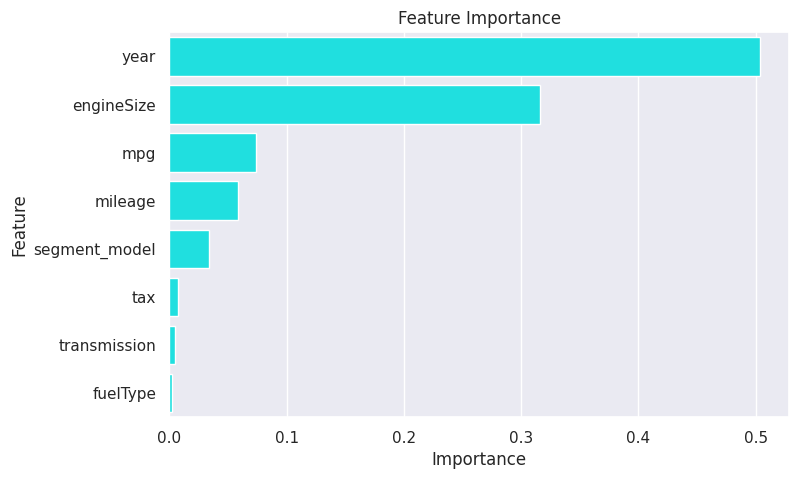

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df, color='cyan')
plt.title('Feature Importance')
plt.show()

### **Conclusion**

The aim of this project is to predict the price of ford cars, by analyzing car features such as brand, year, engine, fuel type, transmission, mileage and segment. During exploratory data analysis, it was discovered that there had been a significant increase in car prices at the beginning of 2016. Cars using hybrid fuel with semi-automatic transmission had higher prices than diesel cars with manual transmission. However, there are more cars with manual transmissions than cars with automatic or automatic transmissions. Sports segment cars have the highest prices among all segments, for other segments the prices are more or less the same.

A decision tree regression model is used to predict car prices. The model is able to predict car prices with an accuracy of 89.06%. The most important features to predict the price of a car are found in the year and engine volume.